In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# Setting display options
pd.set_option('display.max_columns', 500)

In [3]:
# Loading the required datasets

# Loading the dataset related to Loan Applications

application_data = pd.read_csv("application_data.csv")

In [4]:
# Displaying the loaded dataset's head for quick glance
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
# View the shape of the dataset
application_data.shape

(307511, 122)

In [6]:
# Let's understand the data types of all the columns and counts
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


- This is not sufficient information as there are too many columns present in the loaded dataframe, so we will handle this case in Data Handling step.

In [7]:
# Let's view the statistical information from the columns those are already numeric
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

## Data Handling and Data Cleaning
- We will analyze the columns that are required for the analysis, according to the business objective
- We will handle and manage the missing or null values that are present in some of the columns.
- We will correct the data types of certain columns.

#### Extracting required columns
- Let's view the columns and their importance for the analysis.
- We will keep only those columns that are required to achieve the business objective.
- We will ignore all the other extra informations that are present in the dataframe and are not required.

In [8]:
# Let's view first 31 columns
application_data.iloc[:,:32].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2


#### Dropping below mentioned columns after understanding their requirement.
- These columns after dropping are not going to affect the analysis according to the business objective.
    - NAME_TYPE_SUITE
    - REGION_POPULATION_RELATIVE
    - FLAG_MOBIL
    - FLAG_EMP_PHONE
    - FLAG_WORK_PHONE
    - FLAG_CONT_MOBILE
    - FLAG_PHONE
    - FLAG_EMAIL

In [9]:
del application_data['NAME_TYPE_SUITE']
del application_data['REGION_POPULATION_RELATIVE']
application_data.drop(application_data.loc[:,'FLAG_MOBIL':'FLAG_EMAIL'],axis = 1,inplace=True)

In [10]:
# Displaying the dataframe after performing the operation
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648.0,-2120,NaN,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186.0,-291,NaN,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260.0,-2531,26.0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Workin

In [11]:
application_data.shape

(307511, 114)

In [12]:
# Let's analyze the remaining rows and their necessity for the analysis.
application_data.loc[:,'WEEKDAY_APPR_PROCESS_START':].head()

,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


- This dataframe have a lot of non-required and non-essential columns and removing those may not affect our analysis to achieve the business objective.
- After having glance through the columns, only ORGANIZATION_TYPE is required, hence we will extract only that column for further analysis, and ignoring all other columns.

In [13]:
# Dropping non-essential columns from the data
application_data.drop(application_data.loc[:,'WEEKDAY_APPR_PROCESS_START':'LIVE_CITY_NOT_WORK_CITY'],axis = 1,inplace=True)
application_data.drop(application_data.loc[:,'EXT_SOURCE_1':],axis = 1,inplace=True)

In [14]:
# Displaying the result after dropping the columns
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648.0,-2120,NaN,Laborers,1.0,2,2,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186.0,-291,NaN,Core staff,2.0,1,1,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260.0,-2531,26.0,Laborers,1.0,2,2,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833.0,-2437,NaN,Laborers,2.0,2,2,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311.0,-3458,NaN,Core staff,1.0,2,2,Religion


In [15]:
# Analyze final shape of the dataframe after operations
application_data.shape

(307511, 25)

In [16]:
# Displaying the info again so that we can get the information about data types and non-null values.
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

- Now, we have information about columns that are required for analysis. Now we are going to analyze each and every column for null checks and missing values. We can then perform sanity checks also.

In [17]:
# Let's analyze the count of null values present in all the columns.
application_data.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
OCCUPATION_TYPE                 96391
CNT_FAM_MEMBERS                     2
REGION_RATING_CLIENT                0
REGION_RATING_CLIENT_W_CITY         0
ORGANIZATION_TYPE                   0
dtype: int64

In [18]:
# Let's find the percentage of missing data in the OWN_CAR_AGE column
application_data.OWN_CAR_AGE.isnull().sum()/application_data.shape[0]*100

65.9908100848425

In [19]:
# As 65% data is missing in the OWN_CAR_AGE column, so we will discard the column from analysis
application_data.drop(columns=['OWN_CAR_AGE'],axis = 1,inplace=True)

In [20]:
# Let's again analyze the count of null values present in all the columns.
application_data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
ORGANIZATION_TYPE                  0
dtype: int64

In [21]:
# Let's find the percentage of missing data in the OWN_CAR_AGE column
application_data.OCCUPATION_TYPE.isnull().sum()/application_data.shape[0]*100

31.345545362604916

- As approximately 30% of the data is missing, then we can directly drop the column as it may affect the analysis.
- But again, that totally depends upon the importance of the column to achieve business objective.
- So, we will analyze the values present in the OCCUPATION_TYPE column and then decide whether to delete it or not based on the  present and missing data.

In [22]:
# Let's identify the values present in the OCCUPATION_TYPE column
application_data.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [23]:
# Let's analyze the missing value in the OCCUPATION_TYPE column
application_data[application_data.OCCUPATION_TYPE.isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20099,365243,-7427.0,-3514,NaN,2.0,2,2,XNA
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,135000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20417,365243,-5246.0,-2512,NaN,2.0,2,2,XNA
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,225000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-24827,365243,-9012.0,-3684,NaN,2.0,3,3,XNA
28,100033,0,Cash loans,M,Y,Y,0,270000.000,790830.0,57676.5,675000.0,State servant,Higher education,Single / not married,House / apartment,-9994,-1796,-4668.0,-2661,NaN,1.0,1,1,Military
30,100035,0,Cash loans,F,N,Y,0,292500.000,665892.0,24592.5,477000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-15280,-2668,-5266.0,-3787,NaN,2.0,2,2,Business Entity Type 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307486,456230,0,Cash loans,F,Y,Y,1,292500.000,355536.0,18283.5,270000.0,Commercial associate,Higher education,Civil marriage,House / apartment,-16010,-1185,-5034.0,-4392,NaN,3.0,1,1,Business Entity Type 2
307487,456231,0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,936000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23125,365243,-5485.0,-4115,NaN,2.0,2,2,XNA
307500,456244,0,Cash loans,F,N,Y,0,261000.000,1303812.0,35982.0,1138500.0,Working,Higher education,Married,House / apartment,-20390,-5326,-157.0,-3906,NaN,2.0,2,2,Business Entity Type 3
307505,456249,0,Cash loans,F,N,Y,0,112500.000,225000.0,22050.0,225000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-24384,365243,-7369.0,-2357,NaN,1.0,2,2,XNA


- As we can see, the data is evenly spread accross all the columns, so can't find any specific pattern in the columns.
- But, for the analysis purpose, keeping OCCUPATION_TYPE column though can be used to draw some insights and might help in achieving business objectives.
- Hence, we will `keep the OCCUPATION_TYPE column with ~31% of the missing values separately placed into another category as Others` and then proceed further.

In [24]:
application_data.OCCUPATION_TYPE.fillna(value='Other',inplace=True)

In [25]:
application_data.OCCUPATION_TYPE.isnull().sum()

0

In [26]:
# Let's analyse the AMT_ANNUITY column for the missing values.
application_data[application_data.AMT_ANNUITY.isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE
47531,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,450000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10668,-2523,-4946.0,-3238,High skill tech staff,1.0,2,2,Business Entity Type 3
50035,157917,0,Cash loans,F,N,N,0,94500.0,450000.0,NaN,450000.0,Working,Lower secondary,Civil marriage,House / apartment,-9027,-1270,-3640.0,-741,Laborers,2.0,2,2,Business Entity Type 1
51594,159744,0,Cash loans,F,N,N,0,202500.0,539100.0,NaN,450000.0,Working,Secondary / secondary special,Married,House / apartment,-17376,-3950,-11524.0,-831,Cooking staff,2.0,1,1,Self-employed
55025,163757,0,Cash loans,F,N,N,0,162000.0,296280.0,NaN,225000.0,State servant,Higher education,Married,House / apartment,-11329,-2040,-3195.0,-3069,Core staff,2.0,2,2,Government
59934,169487,0,Cash loans,M,Y,N,0,202500.0,360000.0,NaN,360000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19762,-2498,-11285.0,-3305,Laborers,1.0,1,1,Other
75873,187985,0,Cash loans,M,Y,N,0,144000.0,219249.0,NaN,166500.0,Working,Higher education,Single / not married,Rented apartment,-20831,-2450,-771.0,-4203,Drivers,1.0,2,2,Business Entity Type 3
89343,203726,0,Cash loans,F,Y,N,0,90000.0,157500.0,NaN,157500.0,State servant,Secondary / secondary special,Married,House / apartment,-12134,-3721,-858.0,-591,Medicine staff,2.0,2,2,Medicine
123872,243648,0,Cash loans,F,N,Y,0,202500.0,929088.0,NaN,720000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-13902,-3540,-168.0,-4250,Secretaries,2.0,2,2,Self-employed
207186,340147,0,Cash loans,M,N,N,0,171000.0,486000.0,NaN,486000.0,Commercial associate,Higher education,Married,House / apartment,-10151,-472,-10127.0,-2787,Security staff,2.0,2,2,Security
227939,364022,0,Cash loans,F,N,Y,0,315000.0,628069.5,NaN,499500.0,Commercial associate,Higher education,Married,Municipal apartment,-16344,-1478,-482.0,-4192,Sales staff,2.0,1,1,Business Entity Type 3


- As we can see, the target column has only 0 value, so directly dropping those rows may affect the risk analysis.
- So we will assign those null values with the median, even though it is not correct way to assign AMT_ANNUITY.

In [27]:
# Assigning the missing null values in the AMT_ANNUITY column with the median value of the column.
application_data.AMT_ANNUITY.fillna(application_data.AMT_ANNUITY.median, inplace=True)

In [28]:
application_data.AMT_ANNUITY.isnull().sum()

0

In [29]:
# Let's find the null values in appapplication_data once again
application_data.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                      0
AMT_GOODS_PRICE                278
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
DAYS_BIRTH                       0
DAYS_EMPLOYED                    0
DAYS_REGISTRATION                0
DAYS_ID_PUBLISH                  0
OCCUPATION_TYPE                  0
CNT_FAM_MEMBERS                  2
REGION_RATING_CLIENT             0
REGION_RATING_CLIENT_W_CITY      0
ORGANIZATION_TYPE                0
dtype: int64

In [30]:
# Let's consider CNT_FAM_MEMBERS
application_data[application_data.CNT_FAM_MEMBERS.isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE
41982,148605,0,Revolving loans,M,N,Y,0,450000.0,675000.0,33750,NaN,Commercial associate,Lower secondary,Unknown,Municipal apartment,-12396,-1161,-3265.0,-4489,Managers,NaN,2,2,Insurance
187348,317181,0,Revolving loans,F,N,Y,0,202500.0,585000.0,29250,NaN,Commercial associate,Higher education,Unknown,House / apartment,-12844,-232,-1597.0,-1571,Accountants,NaN,2,2,Business Entity Type 2


In [31]:
# Assigning the count of family members is not logically suitable, so we will remove these entries from the data set
application_data = application_data[~application_data.CNT_FAM_MEMBERS.isnull()]

In [32]:
# Now let's consider AMT_GOODS_PRICE, let's analyze the missing values
# Calculating the percentage of missing data in AMT_GOODS_PRICE.
(application_data.AMT_GOODS_PRICE.isnull().sum()/application_data.shape[0])*100

0.08975347063012791

In [33]:
# The missing percentage is very less, that means we have to deal with the missing values and take some decision accordingly
# Let's view the missing data
application_data[application_data.AMT_GOODS_PRICE.isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE
724,100837,0,Revolving loans,F,N,Y,2,45000.0,135000.0,6750,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,-10072,-381,-519.0,-1834,Core staff,4.0,2,2,Kindergarten
5937,106955,0,Revolving loans,F,N,N,0,157500.0,450000.0,22500,NaN,Working,Secondary / secondary special,Married,House / apartment,-11993,-2921,-1289.0,-1948,Private service staff,2.0,2,2,Business Entity Type 3
6425,107494,0,Revolving loans,F,N,N,0,67500.0,202500.0,10125,NaN,Working,Higher education,Married,House / apartment,-9727,-2712,-4132.0,-800,Accountants,2.0,2,2,Trade: type 7
6703,107822,0,Revolving loans,F,N,N,1,121500.0,180000.0,9000,NaN,Working,Secondary / secondary special,Civil marriage,House / apartment,-11079,-899,-3765.0,-572,Managers,3.0,1,1,Government
7647,108913,0,Revolving loans,M,N,Y,0,180000.0,450000.0,22500,NaN,Working,Higher education,Single / not married,House / apartment,-9986,-1847,-4762.0,-506,Security staff,1.0,1,1,Construction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304678,452992,0,Revolving loans,F,N,Y,2,67500.0,202500.0,10125,NaN,Working,Higher education,Married,House / apartment,-11313,-1470,-1188.0,-3523,Sales staff,4.0,2,2,Business Entity Type 3
304784,453120,0,Revolving loans,M,N,Y,1,112500.0,270000.0,13500,NaN,Working,Secondary / secondary special,Married,House / apartment,-16870,-825,-1303.0,-427,Drivers,3.0,2,2,Self-employed
305833,454341,0,Revolving loans,F,N,Y,0,126000.0,270000.0,13500,NaN,Working,Incomplete higher,Single / not married,With parents,-10440,-3444,-4452.0,-3096,Core staff,1.0,2,2,Self-employed
306126,454683,0,Revolving loans,M,N,Y,0,135000.0,270000.0,13500,NaN,Commercial associate,Secondary / secondary special,Married,Municipal apartment,-15406,-427,-8924.0,-4101,Other,2.0,1,1,Security


In [34]:
# Let's view the some values where the data is present
application_data.sample(100)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE
253581,393427,0,Cash loans,F,N,Y,0,157500.0,254700.0,24939,225000.0,Pensioner,Higher education,Widow,House / apartment,-24397,365243,-383.0,-3518,Other,1.0,3,1,XNA
175288,303132,0,Revolving loans,F,Y,N,0,540000.0,495000.0,24750,495000.0,State servant,Higher education,Single / not married,House / apartment,-11274,-2324,-5363.0,-2318,Core staff,1.0,1,1,Postal
77938,190353,0,Revolving loans,M,N,Y,0,301500.0,270000.0,13500,270000.0,Working,Secondary / secondary special,Married,House / apartment,-17967,-4668,-10403.0,-1511,Drivers,2.0,2,2,Self-employed
31500,136539,0,Revolving loans,F,Y,Y,0,216000.0,270000.0,13500,270000.0,Working,Secondary / secondary special,Married,House / apartment,-11027,-396,-534.0,-1140,Other,2.0,2,2,Business Entity Type 3
113264,231362,0,Revolving loans,F,N,Y,0,72000.0,157500.0,7875,157500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21253,365243,-4885.0,-4375,Other,2.0,2,2,XNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186576,316299,0,Cash loans,M,Y,Y,0,247500.0,900000.0,26316,900000.0,Working,Secondary / secondary special,Married,House / apartment,-20883,-4225,-4654.0,-4051,Other,2.0,2,2,Business Entity Type 2
305952,454481,0,Cash loans,F,Y,Y,0,360000.0,1800000.0,98770.5,1800000.0,Commercial associate,Higher education,Widow,House / apartment,-19614,-1455,-8416.0,-2570,Accountants,1.0,2,2,Business Entity Type 3
91938,206766,0,Cash loans,F,Y,Y,2,157500.0,970380.0,34510.5,810000.0,State servant,Higher education,Married,House / apartment,-16318,-2162,-1468.0,-4527,Accountants,4.0,3,3,Agriculture
79695,192381,0,Cash loans,F,N,N,1,292500.0,900000.0,32017.5,900000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-14775,-1258,-2511.0,-3951,Core staff,3.0,2,2,Self-employed


- After going through the data, AMT_CREDIT and AMT_GOODS_PRICE ,these columns seem to be approximately equal.
- To deal with the missing values in the column AMT_GOODS_PRICE, we can use above logic `where the missing values can be replaced with the values from AMT_CREDIT column`. And this is also logically correct in real life :)

In [35]:
# Replacing the null values of AMT_GOODS_PRICE with the values from AMT_CREDIT column
isnull_AMT_GOODS_PRICE = application_data[application_data.AMT_GOODS_PRICE.isnull()]
isnull_AMT_GOODS_PRICE['AMT_GOODS_PRICE'] = isnull_AMT_GOODS_PRICE['AMT_CREDIT']
isnull_AMT_GOODS_PRICE

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE
724,100837,0,Revolving loans,F,N,Y,2,45000.0,135000.0,6750,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-10072,-381,-519.0,-1834,Core staff,4.0,2,2,Kindergarten
5937,106955,0,Revolving loans,F,N,N,0,157500.0,450000.0,22500,450000.0,Working,Secondary / secondary special,Married,House / apartment,-11993,-2921,-1289.0,-1948,Private service staff,2.0,2,2,Business Entity Type 3
6425,107494,0,Revolving loans,F,N,N,0,67500.0,202500.0,10125,202500.0,Working,Higher education,Married,House / apartment,-9727,-2712,-4132.0,-800,Accountants,2.0,2,2,Trade: type 7
6703,107822,0,Revolving loans,F,N,N,1,121500.0,180000.0,9000,180000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-11079,-899,-3765.0,-572,Managers,3.0,1,1,Government
7647,108913,0,Revolving loans,M,N,Y,0,180000.0,450000.0,22500,450000.0,Working,Higher education,Single / not married,House / apartment,-9986,-1847,-4762.0,-506,Security staff,1.0,1,1,Construction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304678,452992,0,Revolving loans,F,N,Y,2,67500.0,202500.0,10125,202500.0,Working,Higher education,Married,House / apartment,-11313,-1470,-1188.0,-3523,Sales staff,4.0,2,2,Business Entity Type 3
304784,453120,0,Revolving loans,M,N,Y,1,112500.0,270000.0,13500,270000.0,Working,Secondary / secondary special,Married,House / apartment,-16870,-825,-1303.0,-427,Drivers,3.0,2,2,Self-employed
305833,454341,0,Revolving loans,F,N,Y,0,126000.0,270000.0,13500,270000.0,Working,Incomplete higher,Single / not married,With parents,-10440,-3444,-4452.0,-3096,Core staff,1.0,2,2,Self-employed
306126,454683,0,Revolving loans,M,N,Y,0,135000.0,270000.0,13500,270000.0,Commercial associate,Secondary / secondary special,Married,Municipal apartment,-15406,-427,-8924.0,-4101,Other,2.0,1,1,Security


In [36]:
# Assigning the replaced values back in the application_data dataframe
application_data[application_data.AMT_GOODS_PRICE.isnull()] = isnull_AMT_GOODS_PRICE
application_data.AMT_GOODS_PRICE.isnull().sum()

0

In [37]:
# Now let's check the null count of values in the dataframe once again
application_data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
ORGANIZATION_TYPE              0
dtype: int64

In [38]:
# Let's view the data in the application_data
application_data.sample(100)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE
92363,207249,0,Revolving loans,F,N,Y,2,135000.0,270000.0,13500,270000.0,Working,Secondary / secondary special,Married,House / apartment,-11314,-1531,-5262.0,-3267,Sales staff,4.0,2,2,Self-employed
13917,116227,0,Revolving loans,F,Y,Y,0,315000.0,270000.0,13500,270000.0,Commercial associate,Higher education,Widow,House / apartment,-19329,-4989,-3219.0,-2873,Managers,1.0,2,2,Self-employed
24863,128918,0,Cash loans,F,N,Y,0,90000.0,585000.0,24916.5,585000.0,Working,Secondary / secondary special,Separated,House / apartment,-18544,-1900,-10557.0,-2071,Laborers,1.0,1,1,Business Entity Type 1
192211,322883,0,Cash loans,M,Y,Y,0,180000.0,592560.0,35937,450000.0,Commercial associate,Higher education,Married,House / apartment,-12482,-2487,-3649.0,-4906,Other,2.0,2,2,Other
51758,159938,0,Cash loans,F,N,Y,0,202500.0,961146.0,31135.5,688500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-16109,-9104,-7873.0,-4344,Sales staff,2.0,2,2,Self-employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278922,423130,0,Cash loans,M,Y,Y,0,180000.0,1288350.0,37669.5,1125000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-16604,-1289,-5210.0,-136,Security staff,2.0,2,2,Security
272109,415447,0,Cash loans,M,Y,N,0,225000.0,1006920.0,40063.5,900000.0,Working,Higher education,Married,House / apartment,-17863,-5048,-3975.0,-1381,Managers,2.0,2,2,Self-employed
244441,382936,0,Cash loans,F,N,Y,0,157500.0,894766.5,29700,679500.0,Working,Secondary / secondary special,Married,House / apartment,-16797,-509,-4718.0,-332,Laborers,2.0,3,3,Business Entity Type 3
185711,315292,0,Cash loans,F,N,Y,1,157500.0,814041.0,23800.5,679500.0,Working,Higher education,Married,House / apartment,-12838,-830,-75.0,-1595,Core staff,3.0,2,2,Kindergarten


In [39]:
# Just an observation, we can see some XNA values in the ORGANIZATION_TYPE column.
# Let's view the data spread in ORGANIZATION_TYPE column
application_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10552
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

- Oops!, there are many XNA values in the ORGANIZATION_TYPE column.
- May be those are missing values where the missing value identifier is XNA. XNA/XAP denote NA values.

In [40]:
# Checking the percentage of the XNA values in ORGANIZATION_TYPE
application_data[application_data.ORGANIZATION_TYPE == 'XNA'].shape[0]/application_data.shape[0]*100

18.00727783577066

- Analyzing the type of data present in the ORGANIZATION_TYPE column, there is one special organization type as 'Other'.
- So we can place the XNA category in 'Other' category.

In [41]:
# Replace the XNA value with 'Other'
application_data.ORGANIZATION_TYPE = application_data.ORGANIZATION_TYPE.apply(lambda x: np.NaN if x=='XNA' else x)
application_data.ORGANIZATION_TYPE.fillna(value="Other",inplace=True)
application_data.ORGANIZATION_TYPE.value_counts()

Other                     72057
Business Entity Type 3    67992
Self-employed             38412
Medicine                  11193
Business Entity Type 2    10552
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

In [42]:
# Inspect the final result set for NaN/missing values
application_data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
ORGANIZATION_TYPE              0
dtype: int64

## Handling Outliers and analysis of the data spread in all columns
- We will analyze the data spread in the columns and then decide what decision should be taken to handle outliers.
- Also, we will reduce the data in the suitable format for analysis.

In [43]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,Religion


In [44]:
#Let's analyze the important columns where outliers might be observed.
#Let's consider AMT_INCOME_TOTAL first
application_data.AMT_INCOME_TOTAL.describe()

count    3.075090e+05
mean     1.687969e+05
std      2.371234e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

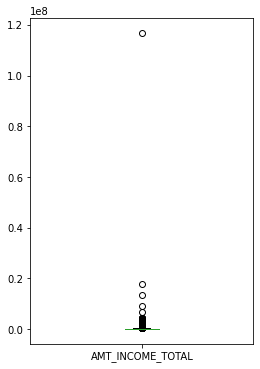

In [52]:
#Let's plot a box plot for this column
plt.figure(figsize=[4,6])
application_data.AMT_INCOME_TOTAL.plot.box()
plt.show()

- Clearly we can see one outlier where the income is more than 100 million
- We can delete this entry because, it may affect the overall statistics matrics for the column as well as it might not be required to consider the analysis.

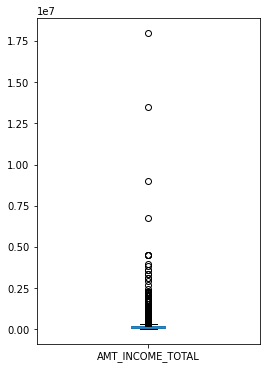

In [56]:
application_data = application_data[application_data.AMT_INCOME_TOTAL <= 100*pow(10,6)]
#Plot a box plot for this column once again
plt.figure(figsize=[4,6])
application_data.AMT_INCOME_TOTAL.plot.box()
plt.show()

#### Analysis of the result:
1. Large amount of data is clustered between income of 0 to 2.5 million units.
2. There are some exceptional cases/ outliers are present for the income greater than 5 million units income. So we will again consider the income range below 5 million for further analysis.

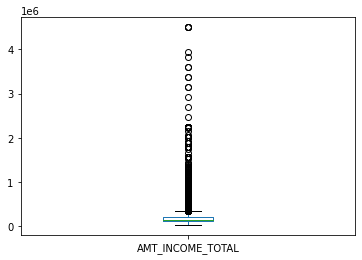

In [70]:
application_data[application_data.AMT_INCOME_TOTAL <= 5*pow(10,6)].AMT_INCOME_TOTAL.plot.box()

- Still there are some outliers/cases which should be eliminated.
- To do this, we can now analyze the 99% quantile value of AMT_INCOME_TOTAL and then take the decision for outliers 

In [68]:
application_data.AMT_INCOME_TOTAL.quantile(0.99)

472500.0

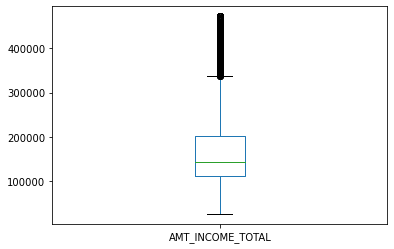

In [71]:
application_data[application_data.AMT_INCOME_TOTAL <= application_data.AMT_INCOME_TOTAL.quantile(0.99)].AMT_INCOME_TOTAL.plot.box()

In [72]:
# This looks some appreciable distribution of the income values, where median is between 0.1 million to 0.2 million and 75% quantile is at 0.2 million.
# Eliminating the values that lie in the 99% to 100% quantile.
application_data = application_data[application_data.AMT_INCOME_TOTAL <= application_data.AMT_INCOME_TOTAL.quantile(0.99)]

In [73]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,Religion


In [74]:
#Let's consider AMT_CREDIT column
application_data.AMT_CREDIT.describe()

count    3.044950e+05
mean     5.938606e+05
std      3.967547e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.094000e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

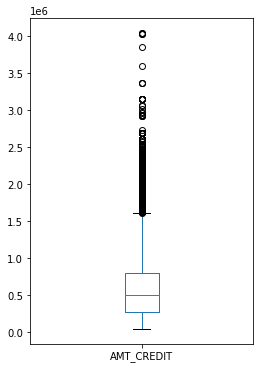

In [76]:
#Let's plot a box plot for this column
plt.figure(figsize=[4,6])
application_data.AMT_CREDIT.plot.box()
plt.show()

- There are some outliers which has value greater than 3.5 million, so we will consider only those values for further analysis.

In [80]:
# Eliminating the values that are greater than 3.5 million
application_data = application_data[application_data.AMT_CREDIT <= 3.5*pow(10,6)]

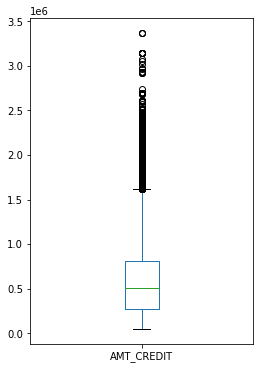

In [83]:
#Let's plot a box plot for this column
plt.figure(figsize=[4,6])
application_data.AMT_CREDIT.plot.box()
plt.show()

In [86]:
# There is sill a outlier which can be harmful for the analysis, so ignoring the max value from the column, we can get rid of it.
# Eliminating the value
application_data = application_data[application_data.AMT_CREDIT<application_data.AMT_CREDIT.max()]

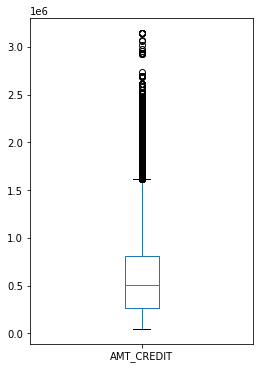

In [87]:
#Let's plot a box plot for this column
plt.figure(figsize=[4,6])
application_data.AMT_CREDIT.plot.box()
plt.show()